 ## Exploring the SIR Data Reduction Method for Visualization
In his 1991 paper, Prof. Ker-Chau Li (UCLA) introduced a fascinating method for supervised dimensionality reduction called SIR (Sliced Inverse Regression) assuming the following model:

$$Y  = f(\beta_1 \mathbf{X}, \dots, \beta_K \mathbf{X},\epsilon ) $$

Where $\mathbf{X} \in \mathbb{R}^{n \times p}$, and $f$ can be any function on $\mathbb{R}^{K+1}.$ Without delving into theory the method works by considering the inverse regression curve $E(\mathbf{X}|Y)$, and estimating $E(\mathbf{X}|Y)$ via slicing. Under some mild assumptions (and assuming $\mathbf{X}$ has been standardized), the inverse regression curve is contained in the subspace spanned by the $\beta_1,\dots, \beta_K$. The method uses a principal components analysis on the covariance matrix of the inverse regression curve to estimate its orientation. 

For fun, I implemented the basic SIR method in python with three methods:
- fit
- transform
- fit_transform

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SIR import SIR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline 

In [2]:
dataset = pd.read_csv('death_rate.txt',delim_whitespace=True,header =None)
dnp = dataset.drop(0,axis = 1).values
Y = dnp[:,-1]
X = dnp[:,:-1]

In [3]:
sir_ = SIR()
sir_.fit(X,Y)

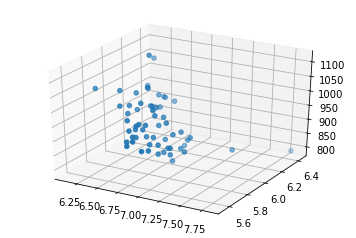

In [4]:
transformed_vals = np.real(sir_.transform(X))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_vals[:,0],transformed_vals[:,1],Y)

### Simulations: 

Suppose we have data $\mathbf{X}\in \mathbb{R}^2$ and:
$$Y = 2X_1 + 1X_3 + 5X_5 +\epsilon$$

with $\epsilon \sim N(0,1)$ and $X_i \sim Unif(0,10)$

Generating the data $(\mathbf{X},Y)_{i=1}^{1000}$:

In [66]:
x_1 = []
x_2 = []
x_3 = []
x_4 = []
x_5 = []
epsilon = []

for i in range(10000):
    epsilon.append(np.random.normal())
    x_1.append(np.random.normal(0,1))
    x_2.append(np.random.normal(0,1))
    x_3.append(np.random.normal(0,1))
    x_4.append(np.random.normal(0,1))
    x_5.append(np.random.normal(0,1))
    
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)
x_5 = np.array(x_5)


X = list(zip(x_1,x_2,x_3,x_4,x_5))
X = np.array(X)
epsilon = np.array(epsilon)
y = (x_1/(6+(x_2-4)**2)) + 0.05*epsilon

In [67]:
sir_ = SIR(K=2)
sir_.fit(X,y)

In [68]:
sir_.eigenvalues

array([  4.21831282e-01,   5.86657706e-02,   1.15274855e-03,
         3.63777298e-04,   3.22464457e-04])

In [69]:
sir_.beta

array([[ 0.99962822, -0.00975436],
       [ 0.01783394,  0.99007336],
       [-0.01251036,  0.05233923],
       [-0.01324167,  0.11335705],
       [ 0.009671  , -0.0637996 ]])

In [70]:
5/ np.sqrt(2**2 + 5**2 +1)

0.9128709291752769

In [71]:
1/ np.sqrt(2**2 + 5**2 +1)

0.18257418583505536

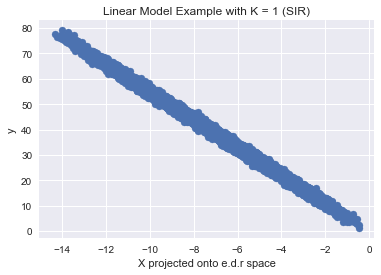

In [25]:
new = sir_.transform(X)
plt.title('Linear Model Example with K = 1 (SIR)')
plt.xlabel('X projected onto e.d.r space')
plt.ylabel('y')
plt.scatter(new,y)
plt.savefig('linexample.jpg')

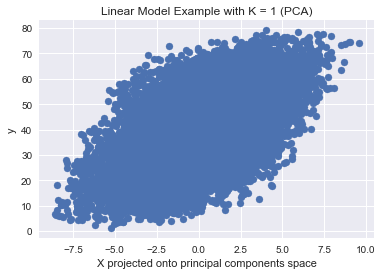

In [30]:
pca = PCA(n_components =1)
pca.fit(X)
new = pca.transform(X)
plt.title('Linear Model Example with K = 1 (PCA)')
plt.xlabel('X projected onto principal components space')
plt.ylabel('y')
plt.scatter(new,y)
plt.savefig('linexamplepca.jpg')


### Simulations: 

Suppose we have data $\mathbf{X}\in \mathbb{R}^2$ and:
$$Y = (2X_1 + 1X_3 + 5X_5 +\epsilon)^2$$

with $\epsilon \sim N(0,1)$ and $X_i \sim Unif(0,10)$

Generating the data $(\mathbf{X},Y)_{i=1}^{1000}$:

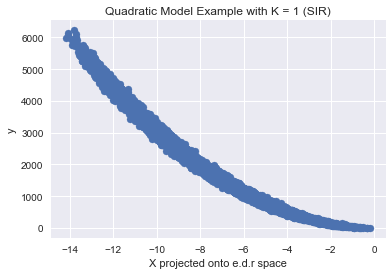

In [50]:
new = sir_.transform(X)
plt.title('Quadratic Model Example with K = 1 (SIR)')
plt.xlabel('X projected onto e.d.r space')
plt.ylabel('y')
plt.scatter(new,y)
plt.savefig('quadexample.jpg')

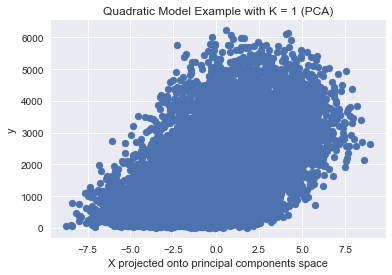

In [52]:
pca = PCA(n_components =1)
pca.fit(X)
new = pca.transform(X)
plt.title('Quadratic Model Example with K = 1 (PCA)')
plt.xlabel('X projected onto principal components space')
plt.ylabel('y')
plt.scatter(new,y)
plt.savefig('quadexamplepca.jpg')


### Example 3: Rational Function

Suppose we have data $\mathbf{X}\in \mathbb{R}^5$ and:
$$Y = \frac{X_1}{6.0 + (X_2 - 4.0)^2} + \epsilon$$ 

with $\epsilon \sim N(0,1)$ and $X_i \sim Unif(0,10)$

Generating the data $(\mathbf{X},Y)_{i=1}^{1000}$:

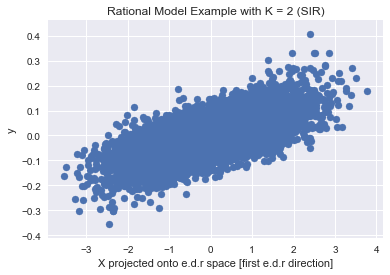

In [85]:
new = sir_.transform(X)
plt.title('Rational Model Example with K = 2 (SIR)')
plt.xlabel('X projected onto e.d.r space [first e.d.r direction]')
plt.ylabel('y')
plt.scatter(new[:,0],y)
plt.savefig('ratexample')

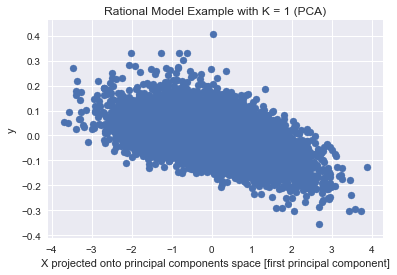

In [84]:
pca = PCA(n_components =2)
pca.fit(X)
new = pca.transform(X)
plt.title('Rational Model Example with K = 1 (PCA)')
plt.xlabel('X projected onto principal components space [first principal component]')
plt.ylabel('y')
plt.scatter(new[:,0],y)
plt.savefig('ratexamplepca.jpg')


In [121]:
from sklearn import preprocessing
dataset = pd.read_csv('death_rate.txt',delim_whitespace=True,header =None)
dnp = dataset.drop(0,axis = 1).values
Y = dnp[:,-1]
X = dnp[:,:-1]
X = preprocessing.scale(X)

sir_ = SIR(K = 2)
sir_.fit(X,Y)
pca_ = PCA(n_components = 2)
pca_.fit(X,Y)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [122]:
X.shape

(60, 15)

In [123]:
new1 = pca_.transform(X)
new2 = sir_.transform(X)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [125]:
kf = KFold(n_splits = 5)

In [126]:
scores_sir = []
scores_pca = []
scores_ = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    sir_ = SIR(K = 2)
    sir_.fit(X_train,Y_train)
    pca_ = PCA(n_components = 2)
    pca_.fit(X_train,Y_train)
    new1 = pca_.transform(X_train)
    new2 = sir_.transform(X_train)
    
    test1 = pca_.transform(X_test)
    test2 = sir_.transform(X_test)
    
    #pca
    lr1 = LinearRegression()
    lr1.fit(new1,Y_train)
    scores_pca.append(lr1.score(test1,Y_test))
    
    #sir
    lr2 = LinearRegression()
    lr2.fit(new2,Y_train)
    scores_sir.append(lr2.score(test2, Y_test))
    
    #regular
    lr3 = LinearRegression()
    lr3.fit(X_train,Y_train)
    scores_.append(lr3.score(X_test,Y_test))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims)


In [127]:
np.round(scores_sir,3)

array([ 0.301,  0.474,  0.351,  0.634,  0.613])

In [130]:
np.mean(scores_pca)

-0.0042783482076253817

In [129]:
np.round(scores_,3)

array([ 0.398,  0.652,  0.053,  0.718,  0.543])

In [131]:
sir_.beta

array([[-0.20570911+0.j, -0.04392129+0.j],
       [ 0.31572076+0.j,  0.12441967+0.j],
       [ 0.14975700+0.j,  0.04507387+0.j],
       [ 0.23498557+0.j,  0.08220104+0.j],
       [ 0.16069849+0.j,  0.17190218+0.j],
       [ 0.22959850+0.j, -0.10240789+0.j],
       [ 0.00228896+0.j,  0.05313859+0.j],
       [-0.19713027+0.j,  0.00532626+0.j],
       [-0.44712129+0.j, -0.06440373+0.j],
       [-0.07905227+0.j,  0.21740221+0.j],
       [-0.08541229+0.j,  0.03174061+0.j],
       [ 0.47239276+0.j,  0.65852437+0.j],
       [-0.46426545+0.j, -0.65972085+0.j],
       [-0.10110450+0.j,  0.09800590+0.j],
       [ 0.02392305+0.j, -0.00143332+0.j]])

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


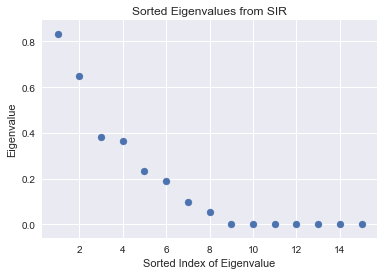

In [159]:
plt.scatter(range(1,len(sir_.eigenvalues)+1),sir_.eigenvalues)
plt.xlabel("Sorted Index of Eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("Sorted Eigenvalues from SIR")
plt.savefig("Eigvalues")